In [2]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\Capaciti\Desktop\data_quality_issues.csv'  # Ensure the full path to the file
df = pd.read_csv(file_path)

# Display summary statistics for numerical variables
summary_statistics = df.describe()
print(summary_statistics)

        Record ID  Records Affected
count  500.000000         500.00000
mean   250.500000          49.64000
std    144.481833          28.94744
min      1.000000           1.00000
25%    125.750000          24.75000
50%    250.500000          49.00000
75%    375.250000          75.25000
max    500.000000          99.00000


In [3]:
#Identify and list the top 3 departments with the most data quality issues
top_departments = df['Department'].value_counts().head(3)
print(top_departments)

IT         112
Finance    109
HR          95
Name: Department, dtype: int64


In [4]:
#Find which data source has the highest number of high-severity issues
high_severity_issues = df[df['Issue Severity'] == 'High']
top_data_source = high_severity_issues['Data Source'].value_counts().idxmax()
print(top_data_source)

Legacy Database


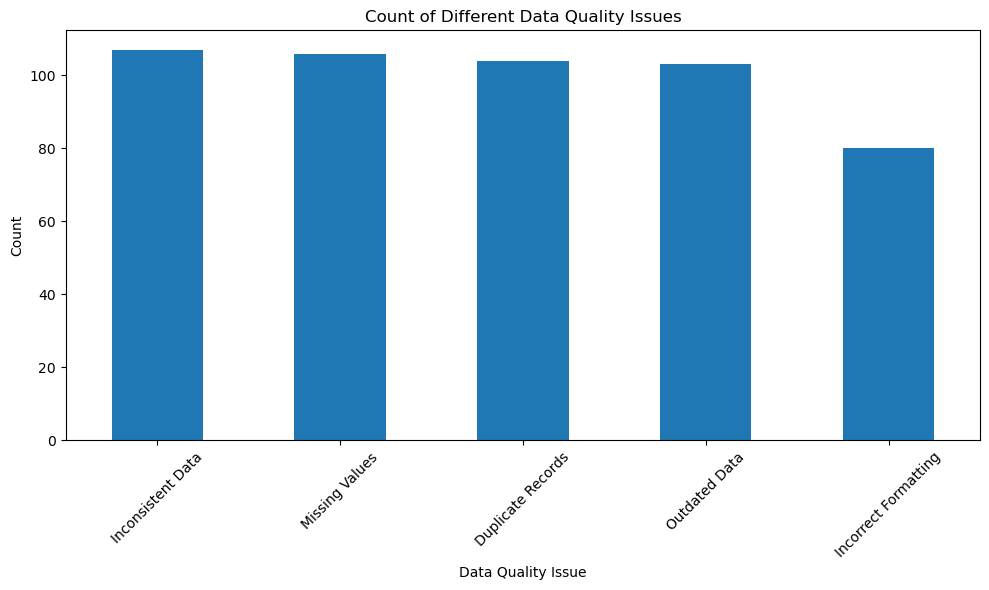

In [5]:
#Generate a bar chart visualizing the count of different data quality issues
import matplotlib.pyplot as plt

issue_counts = df['Data Quality Issue'].value_counts()
plt.figure(figsize=(10, 6))
issue_counts.plot(kind='bar')
plt.title('Count of Different Data Quality Issues')
plt.xlabel('Data Quality Issue')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('data_quality_issues_bar_chart.png')
plt.show()

In [6]:
#Identify duplicate records and remove them
duplicates = df.duplicated().sum()
df_cleaned = df.drop_duplicates()
print(f'Duplicate records removed: {duplicates}')

Duplicate records removed: 0


In [7]:
#Check for missing values and provide a strategy to handle them
missing_values = df_cleaned.isnull().sum()
print(missing_values)

Record ID             0
Department            0
Data Source           0
Data Quality Issue    0
Records Affected      0
Issue Severity        0
dtype: int64


In [8]:
#Identify departments where the number of affected records is significantly higher than usual
outlier_departments = df_cleaned.groupby('Department')['Records Affected'].sum().sort_values(ascending=False).head(3)
print(outlier_departments)

Department
Finance      5378
IT           5176
Marketing    5031
Name: Records Affected, dtype: int64


In [9]:
#Find the top 2 departments with the most high-severity issues and explain possible causes
top_high_severity_departments = high_severity_issues['Department'].value_counts().head(2)
print(top_high_severity_departments)

IT         36
Finance    36
Name: Department, dtype: int64


<Figure size 1000x600 with 0 Axes>

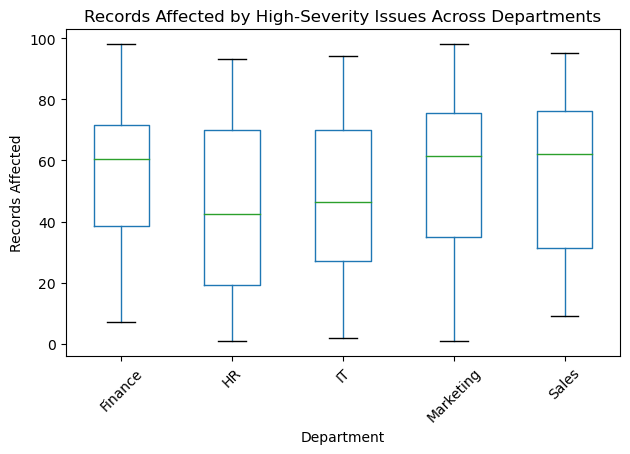

In [10]:
#Generate a boxplot to visualize records affected by high-severity issues across departments
plt.figure(figsize=(10, 6))
high_severity_issues.boxplot(column='Records Affected', by='Department', grid=False)
plt.title('Records Affected by High-Severity Issues Across Departments')
plt.suptitle('')
plt.xlabel('Department')
plt.ylabel('Records Affected')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('high_severity_issues_boxplot.png')
plt.show()